*   **Code** : TSP(Genetic Algorithm)
*   **Date** : 2021/07/27(v 1.2)

*   **Note** : 유전 알고리즘

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import random
import numpy as np
import time
import copy
import math
import statistics
from matplotlib import pyplot as plt

data = pd.read_csv('/content/gdrive/MyDrive/inputData.txt', sep='\t')
data

,CUST,NO.,XCOORD.,YCOORD.,DEMAND,READY,TIME,DUE,DATE,SERVICE,TIME.1
0,NaN,1,50,13,0,0,835,0,0.315246,NaN,NaN
1,NaN,2,47,24,0,8,26,0,0.559647,NaN,NaN
2,NaN,3,5,15,0,259,272,0,0.779136,NaN,NaN
3,NaN,4,5,1,0,237,259,0,0.384739,NaN,NaN
4,NaN,5,44,44,0,70,90,0,0.253320,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,96,42,28,0,107,118,0,0.032621,NaN,NaN
96,NaN,97,17,38,0,377,405,0,0.455031,NaN,NaN
97,NaN,98,41,25,0,452,476,0,0.287996,NaN,NaN
98,NaN,99,19,3,0,235,238,0,0.453336,NaN,NaN


In [ ]:
# X,Y 좌표 리스트로 저장
A = []
for i in range(len(data)):
    A.append(list(data.iloc[i,2:4]))

# 유클리드 거리 행렬
def euclidean(A):
    result = []
    for i in A:
        for j in A:
            tmp = np.sqrt(np.sum(np.square(np.array(i)-np.array(j))))
            result.append(tmp)
    result = np.array(result)
    result = np.reshape(result, (len(A), len(A)))
    result = pd.DataFrame(result)
    return result

In [ ]:
df = euclidean(A)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.000000,11.401754,45.044423,46.572524,31.575307,23.194827,14.422205,31.622777,9.055385,26.172505,10.816654,18.000000,18.027756,33.015148,36.235342,36.715120,31.780497,45.607017,46.324939,42.047592,35.735137,46.043458,10.630146,37.000000,13.453624,51.971146,50.009999,30.265492,22.360680,30.413813,8.246211,38.275318,15.000000,46.400431,33.837849,51.923020,28.635642,34.365681,51.884487,17.000000,...,14.317821,11.180340,15.231546,38.600518,8.602325,24.186773,45.880279,13.601471,12.083046,29.832868,20.248457,46.400431,30.413813,38.418745,42.190046,48.259714,27.513633,42.755117,38.470768,37.215588,47.381431,40.000000,38.600518,29.681644,19.416488,23.086793,14.142136,33.734256,3.605551,10.770330,1.414214,30.016662,25.553865,30.805844,17.117243,17.000000,41.400483,15.000000,32.572995,8.062258
1,11.401754,0.000000,42.953463,47.885280,20.223748,24.413111,9.486833,24.041631,13.416408,15.000000,20.223748,7.615773,19.209373,32.310989,26.248809,29.832868,28.284271,35.355339,38.626416,35.693137,24.351591,38.078866,6.403124,32.015621,7.280110,44.598206,46.010868,27.892651,11.401754,31.384710,3.162278,30.675723,23.769729,38.013156,36.400549,47.095647,32.526912,23.086793,44.922155,12.369317,...,11.180340,17.464249,12.083046,28.284271,18.110770,13.000000,40.311289,22.561028,2.000000,20.000000,24.083189,36.069378,19.416488,29.966648,39.623226,45.398238,30.479501,43.382024,38.910153,26.019224,38.013156,29.698485,28.284271,22.561028,13.000000,26.172505,14.212670,34.985711,8.062258,1.414214,12.165525,28.792360,30.610456,32.449961,19.104973,6.403124,33.105891,6.082763,35.000000,3.605551
2,45.044423,42.953463,0.000000,14.000000,48.600412,22.561028,33.541020,24.839485,36.124784,48.373546,40.521599,47.759816,27.166155,12.369317,34.058773,20.615528,14.866069,38.013156,23.769729,17.464249,46.690470,25.000000,37.336309,14.142136,35.693137,24.000000,8.944272,15.132746,39.357337,16.552945,43.416587,23.021729,38.626416,27.202941,18.384776,13.000000,23.600847,51.224994,22.022716,30.594117,...,32.249031,35.693137,31.256999,36.400549,41.000000,47.413078,14.142136,39.217343,41.000000,33.421550,27.513633,38.910153,39.824616,26.627054,3.605551,4.242641,21.954498,10.440307,10.630146,53.907328,32.893768,36.619667,36.400549,24.413111,30.364453,24.698178,31.000000,15.000000,43.011626,41.773197,44.102154,15.033296,27.459060,17.492856,28.284271,39.217343,25.942244,37.363083,18.439089,44.407207
3,46.572524,47.885280,14.000000,0.000000,58.051701,23.769729,38.587563,35.510562,37.643060,56.639209,39.115214,54.083269,29.154759,16.278821,45.650849,32.695565,23.600847,50.921508,37.483330,30.805844,57.201399,38.639358,41.593269,26.000000,40.816663,38.000000,22.360680,21.931712,47.423623,16.552945,47.423623,35.468296,36.000000,40.792156,13.038405,26.476405,19.000000,60.959003,36.013886,36.055513,...,36.715120,35.693137,35.846897,48.301139,40.311289,55.317267,28.071338,37.013511,46.141088,43.600459,26.476405,51.865210,49.819675,39.000000,16.278821,17.262677,19.235384,5.000000,9.219544,63.890531,46.324939,48.754487,48.301139,34.409301,37.013511,23.537205,34.014703,13.000000,45.541190,46.529560,45.354162,19.849433,23.021729,15.811388,29.732137,45.803930,38.897301,43.266615,14.142136,48.332184
4,31.575307,20.223748,48.600412,58.051701,0.000000,38.013156,23.769729,23.853721,32.140317,5.830952,40.000000,14.317821,34.176015,41.868843,17.262677,29.068884,34.655447,22.561028,33.541020,34.539832,5.830952,32.388269,24.083189,34.669872,22.360680,39.319207,47.853944,36.124784,11.704700,43.266615,23.345235,27.856777,43.104524,31.144823,49.396356,47.169906,47.423623,3.162278,40.607881,24.698178,...,25.961510,36.221541,26.248809,17.000000,38.013156,7.615773,39.924930,42.047592,20.024984,15.264338,40.162171,22.803509,8.944272,25.000000,45.000000,49.396356,44.7213

In [ ]:
# 무작위 경로 설정
def route():
    route = []
    for i in range(1,len(df)):
        route.append(i)
        route = random.sample(route,len(route))
    return route

# 두 리스트를 비교하여 없는 값을 반환
def compare(list1, list2):
    s = set(list2)
    list3 = [x for x in list1 if x not in s]
    return list3

# population 생성
def population(num):
    population = []
    for i in range(num):
        population.append(route())
    return population

# 유전자의 적합도 계산
def fitness(route):
    sum = 0
    for i in range(len(route)-1):
        sum += df[route[i]][route[i+1]]
    tmp = df[0][route[0]] + df[route[len(route)-1]][0]
    sum += tmp
    return sum

# population 중에서 selection
def selection(pop):
    lists = list(range(len(pop)))
    random_ind = random.sample(lists, 2)
    first = pop[random_ind[0]]
    second = pop[random_ind[1]]
    r = random.random()
    
    if fitness(first) > fitness(second):
        if r < 0.8:
            return second
        else:
            return first
    else:
        if r < 0.8:
            return first
        else:
            return second

# 교차(자름선 1개)
def crossover_1(parent_1, parent_2, rest):
    child = []
    for i in range(len(parent_1)):
        if i <= 50:
            child.append(parent_1[i])
        elif i > 50:
            if parent_2[i] not in child:
                child.append(parent_2[i])
                if parent_2[i] in rest:
                    rest.remove(parent_2[i])
            else:
                child.append(rest[0])
                rest.remove(rest[0])
    return child

# 교차(자름선 5개)
def crossover_5(parent_1, parent_2):
    child = [0 for i in range(len(parent_1))]
    for i in [20,60]:
        child[i:i+20] = parent_1[i:i+20]

    rest = compare(parent_1, child)

    for j in [0, 40, 80]:
        for k in range(20):
            if j == 99:
                break
            if parent_2[j] not in child:
                child[j] = parent_2[j]
                if parent_2[j] in rest:
                    rest.remove(parent_2[j])
            else:
                child[j] = rest[0]
                rest.remove(rest[0])

            j = j+1
    return child

# 교차(자름선 10개)
def crossover_10(parent_1, parent_2):
    child = [0 for i in range(len(parent_1))]
    for i in [70,10,40,30,80]:
        child[i:i+10] = parent_1[i:i+10]

    rest = compare(parent_1, child)

    for j in [20, 60, 50, 0, 90]:
        for k in range(10):
            if j == 99:
                break
            if parent_2[j] not in child:
                child[j] = parent_2[j]
                if parent_2[j] in rest:
                    rest.remove(parent_2[j])
            else:
                child[j] = rest[0]
                rest.remove(rest[0])

            j = j+1
    return child

# mutation
def mutation(lists,count):
    new_list = copy.copy(lists)
    rand_ind = random.choices(list(range(99)),k=count)
    for i in range(len(rand_ind)-1):
        new_list[int(rand_ind[i])], new_list[int(rand_ind[i+1])] = new_list[int(rand_ind[i+1])],new_list[int(rand_ind[i])]
    return new_list


In [ ]:
# 초기 population
pop_init = population(15)
pop_init.append([90, 88, 30, 99, 1, 89, 22, 24, 6, 62, 60, 39, 84, 58, 48, 16, 55, 27, 91, 13, 29, 93, 87, 34, 98, 36, 76, 85, 70, 53, 94, 12, 86, 8, 61, 64, 10, 67, 32, 56, 97, 68, 49, 50, 11, 65, 9, 57, 28, 95, 42, 4, 37, 20, 72, 69, 46, 7, 83, 15, 52, 31, 73, 96, 33, 21, 18, 25, 38, 40, 66, 47, 26, 35, 75, 2, 74, 44, 41, 59, 23, 78, 51, 3, 43, 5, 92, 19, 80, 17, 71, 54, 81, 63, 14, 79, 45,82,77])

pop_process = copy.copy(pop_init)
best_dist = fitness(pop_init[0])
fit_init = []
for i in range(len(pop_process)):
    fit_init.append(fitness(pop_process[i]))
fit_parent = copy.copy(fit_init)

# 변이의 개수
k = 2

650.7896775823685
633.1141653268592
632.7699112251563
631.0734284285667
626.5745112542835
623.2121066876688
622.8340839706191
611.3597940037064
582.6314147284261
582.2017370653061
579.4662828823266
577.439172475167
576.4114193261263
576.2369515295222
575.6968426007485
572.982624978463
571.408049404021
569.0537194125435
567.6330222455849
564.4896109276839
563.7157395711955
562.8789532129857
560.8485960436432
559.802542849416
558.7199174200942
558.2369735973998
555.6774827617668
551.7207084000845
551.5044119186734
549.4636750203811
549.2738215572566
548.4471451215489
548.1879751344574
546.4064082232564
544.5378557421552
543.0844166071516
543.0307608287138
541.5766871010447
539.6219716205701
539.4480084774958
537.8439865010309
534.3719033429288


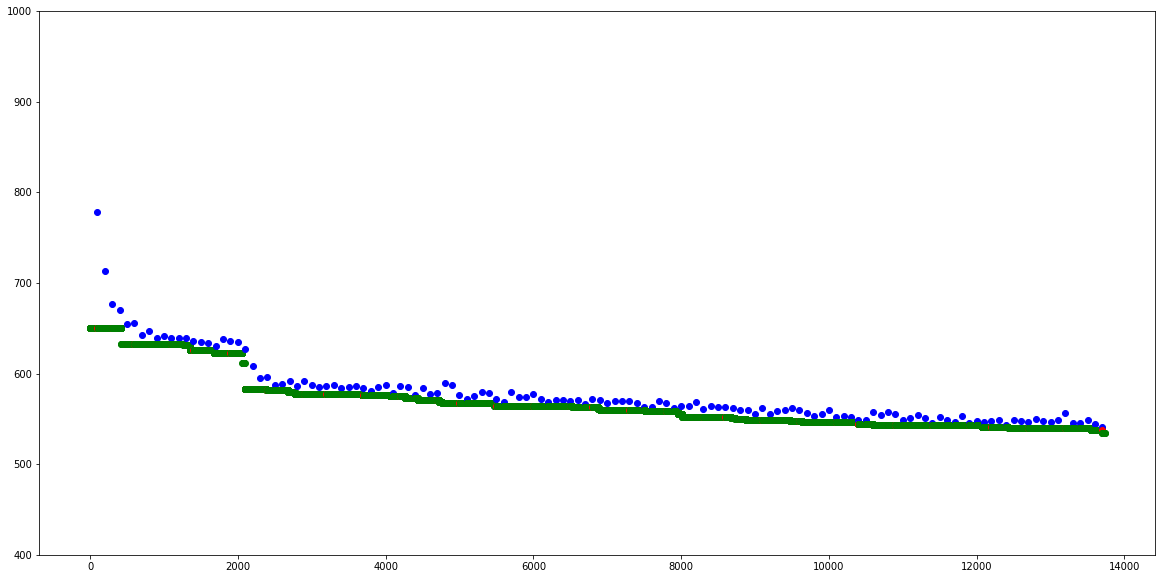

In [ ]:
start = time.time()
iter = 0
plt.figure(figsize=(20,10))
plt.ylim(400,1000)
while (time.time()-start) <= 300:
    #시간이 지나면 변이를 줄임
    if time.time()-start == 100:
        k = 1

    parent_1 = copy.copy(selection(pop_process))
    parent_2 = copy.copy(selection(pop_process))
    # 자름선 5개 사용
    child = crossover_5(parent_1, parent_2)
    mut = mutation(child,k)

    # 적합도 가장 않좋은 인덱스
    max_ind = fit_parent.index(max(fit_parent))
    # 교체
    pop_process[max_ind] = mut
    pop_process = copy.deepcopy(pop_process)
    fit_parent[max_ind] = fitness(mut)
    fit_parent = copy.copy(fit_parent)
    
    min_dist = min(fit_parent)
    average = statistics.mean(fit_parent)
    plt.scatter(iter,min_dist,c='g')
    if min_dist < best_dist:
        best_dist = min_dist
        print(best_dist)
    # 그래프
    if iter % 100 == 0:
        plt.scatter(iter,average,c='b')
        plt.scatter(iter, best_dist,c='r')
    
    iter += 1

plt.show()

In [ ]:
best = pop_process[fit_parent.index(min(fit_parent))]
best.insert(0,0)
best.append(0)
print(best)

[0, 90, 88, 99, 30, 1, 89, 22, 24, 6, 60, 62, 39, 84, 58, 48, 16, 55, 27, 91, 13, 87, 98, 93, 34, 36, 92, 76, 85, 70, 53, 5, 12, 94, 8, 61, 64, 10, 67, 32, 56, 97, 68, 49, 50, 11, 65, 9, 57, 95, 28, 42, 4, 37, 79, 20, 72, 46, 7, 73, 15, 52, 19, 31, 96, 33, 21, 18, 25, 38, 40, 66, 47, 35, 26, 75, 2, 74, 44, 41, 59, 23, 78, 51, 3, 43, 77, 29, 45, 80, 71, 17, 54, 81, 63, 82, 14, 69, 83, 86, 0]
